# Text Preprocessing

 - This tutorial demonstrates how to preprocess text data and perform exploratory data analysis (EDA) on a dataset of over 60,000 Spotify app reviews scraped from Google Play Store. Download the dataset [here](https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022)

 - Our goal is to clean the text data and analyze it to uncover key patterns and prepare it for advanced NLP tasks such as sentiment analysis or topic modeling

## 0. Objectives:

1. Import the dataset
2. Exploratory Data Analysis (EDA) for text data
3. Understand and apply basic text preprocessing techniques: cleaning, tokenization, removal of stop word and lemmatization

## 1. Import Data

In [1]:
import pandas as pd

In [2]:
# import data to pandas dataframe

raw_reviews = pd.read_csv("reviews.csv")

raw_reviews.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


## 2. EDA 

In [3]:
# the info method gives you an overview of the data

raw_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
raw_reviews.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [5]:
# lower column names

# str is called a string accessor

raw_reviews.columns = raw_reviews.columns.str.lower()

raw_reviews.columns

Index(['time_submitted', 'review', 'rating', 'total_thumbsup', 'reply'], dtype='object')

In [6]:
# checking the distribution of the reviews in terms of rating

raw_reviews['rating'].value_counts(normalize=True).sort_values(ascending=False)

rating
5    0.358720
1    0.286603
4    0.127318
2    0.115563
3    0.111797
Name: proportion, dtype: float64

In [7]:
# mean rating of spotify for this dataset

raw_reviews['rating'].mean()

3.1559892197291943

In [8]:
# checking the average review length in characters

raw_reviews['review_length'] = raw_reviews['review'].apply(len)  

print(f"Average review length: {raw_reviews['review_length'].mean():.2f} characters")

Average review length: 163.32 characters


In [9]:
# we can also check the distribution of the reviews length

raw_reviews['review_length'].describe()

count    61594.000000
mean       163.323457
std        119.940997
min         10.000000
25%         72.000000
50%        130.000000
75%        221.000000
max       3753.000000
Name: review_length, dtype: float64

In [10]:
# longest review!!!

# loc[row/index_label, column_name(s)]

raw_reviews.loc[raw_reviews['review_length']==3753, 'review'].values

array(["I very rarely leave reviews and if I do, they're almost never negative but I feel compelled in this instance, as the Spotify app has got to be the worst app I have ever used. I'm on pay as you go with no Internet access unless I'm on Wi-Fi and all I use this app for is to listen to podcasts which I download in full before my work commute. It's obvious it simply has not been designed with any consideration for a user like myself. I would go as far as to state that it's terrible for podcasts in general, regardless of how you use your phone. To give you some examples: 1. When I'm at work, my phone will connect to the work Wi-Fi. There's an internal authorisation process to let devices use Internet when on the company network. What happens is that I can't play any podcasts if my phone's Wi-Fi is on - I press the play button, but nothing happens. I have two phones, one authorised to use the network and one not and this happens on both of them. I think what is taking place in the fir

In [11]:
# examine the span of time for the reviews

raw_reviews['time_submitted'] = pd.to_datetime(raw_reviews['time_submitted'])

raw_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time_submitted  61594 non-null  datetime64[ns]
 1   review          61594 non-null  object        
 2   rating          61594 non-null  int64         
 3   total_thumbsup  61594 non-null  int64         
 4   reply           216 non-null    object        
 5   review_length   61594 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.8+ MB


In [12]:
raw_reviews.sort_values('time_submitted', inplace=True, ignore_index=True)

raw_reviews.head()

,time_submitted,review,rating,total_thumbsup,reply,review_length
0,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN,216
1,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN,272
2,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN,493
3,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN,263
4,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN,279


In [13]:
raw_reviews.tail()

,time_submitted,review,rating,total_thumbsup,reply,review_length
61589,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,100
61590,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,47
61591,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,106
61592,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,86
61593,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,112


## 3. Text Preprocessing

Text preprocessing transforms raw text into clean, structured data suitable for analysis. 
This includes steps like lowercasing, removing punctuation and stopwords, tokenizing the text, and lemmatizing words

#### Steps in Preprocessing
1. **Lowercasing:** Treat words like "Music" and "music" as the same
2. **Removing Punctuation/Numbers:** Remove symbols and digits that don't add meaning to the analysis
3. **Tokenization:** Split text into individual words (tokens)
4. **Stopword Removal:** Remove common words like "the" and "is" that don't carry significant meaning
5. **Lemmatization:** Normalize words to their base form (e.g., "children" → "child"), this minimizes the # of distinct words


In [14]:
# install NLTK package for NLP

!pip install nltk

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Punkt is a multi-language, pre-trained, unsupervised sentence tokenizer in the NLTK library
nltk.download('punkt')

# List of stopwords in many spoken languages
nltk.download('stopwords')

# WordNet is a large, lexical database of the English language. Here it will handle the lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dina.deifallah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dina.deifallah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dina.deifallah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# let's examine a single review

sample = raw_reviews['review'][600]

sample

"Stops playing after one track??? Have to close and restart app to make it play again. Why??? I had to log out of app and delete from my phone and reinstall to fix the issue. This resulted in me losing all my downloads?! On a Pixel 5? If you can't get it right on vanilla Android when are you ever going to get it right?! RUBBISH!!!!!!"

In [17]:
# lowercasing

sample = sample.lower()

sample

"stops playing after one track??? have to close and restart app to make it play again. why??? i had to log out of app and delete from my phone and reinstall to fix the issue. this resulted in me losing all my downloads?! on a pixel 5? if you can't get it right on vanilla android when are you ever going to get it right?! rubbish!!!!!!"

 - Re is short for Regular Expressions
 - It is a Python module that allows us to find patterns in text and perform certain actions
 - You can find the documentation [here](https://docs.python.org/3/library/re.html)
 - For writing text search patterns, a.k.a. regex, take a look at this detailed [cheatsheet](https://media.datacamp.com/legacy/image/upload/v1665049611/Marketing/Blog/Regular_Expressions_Cheat_Sheet.pdf)


In [18]:
# removing the punctuation 

# ^ inside []: Negates the set, meaning "anything NOT matching this set"
# \w: Matches any word character (letters, digits, or underscores)
# \s: Matches any whitespace character (spaces, tabs, etc.)
# so, [^\w\s] matches any character that is not a word character or whitespace

sample = re.sub(r'[^\w\s]', '', sample)

print(sample)


stops playing after one track have to close and restart app to make it play again why i had to log out of app and delete from my phone and reinstall to fix the issue this resulted in me losing all my downloads on a pixel 5 if you cant get it right on vanilla android when are you ever going to get it right rubbish


In [19]:
# remove digits

# \d: Matches any digit (0-9)
# +: Matches one or more of the preceding token

sample = re.sub(r'\d+', '', sample)

sample

'stops playing after one track have to close and restart app to make it play again why i had to log out of app and delete from my phone and reinstall to fix the issue this resulted in me losing all my downloads on a pixel  if you cant get it right on vanilla android when are you ever going to get it right rubbish'

In [20]:
# Tokenize the text

sample_tokens = word_tokenize(sample)

print(sample_tokens)

['stops', 'playing', 'after', 'one', 'track', 'have', 'to', 'close', 'and', 'restart', 'app', 'to', 'make', 'it', 'play', 'again', 'why', 'i', 'had', 'to', 'log', 'out', 'of', 'app', 'and', 'delete', 'from', 'my', 'phone', 'and', 'reinstall', 'to', 'fix', 'the', 'issue', 'this', 'resulted', 'in', 'me', 'losing', 'all', 'my', 'downloads', 'on', 'a', 'pixel', 'if', 'you', 'cant', 'get', 'it', 'right', 'on', 'vanilla', 'android', 'when', 'are', 'you', 'ever', 'going', 'to', 'get', 'it', 'right', 'rubbish']


In [21]:
stop_words = stopwords.words('english')
                 
#stop_words

In [22]:
# remove stopwords

stop_words = set(stopwords.words('english'))

sample_tokens = [word for word in sample_tokens if word not in stop_words]

print(sample_tokens)

['stops', 'playing', 'one', 'track', 'close', 'restart', 'app', 'make', 'play', 'log', 'app', 'delete', 'phone', 'reinstall', 'fix', 'issue', 'resulted', 'losing', 'downloads', 'pixel', 'cant', 'get', 'right', 'vanilla', 'android', 'ever', 'going', 'get', 'right', 'rubbish']


In [23]:
# lemmatize the resulting tokens

lemmatizer = WordNetLemmatizer()

sample_tokens = [lemmatizer.lemmatize(word) for word in sample_tokens]

print(sample_tokens)

['stop', 'playing', 'one', 'track', 'close', 'restart', 'app', 'make', 'play', 'log', 'app', 'delete', 'phone', 'reinstall', 'fix', 'issue', 'resulted', 'losing', 'downloads', 'pixel', 'cant', 'get', 'right', 'vanilla', 'android', 'ever', 'going', 'get', 'right', 'rubbish']


In [24]:
# regroup the tokens as a single text

sample_cleaned = ' '.join(sample_tokens)

sample_cleaned

'stop playing one track close restart app make play log app delete phone reinstall fix issue resulted losing downloads pixel cant get right vanilla android ever going get right rubbish'

In [25]:
# now we can build a cleaning function that has all these steps and apply it to the entire dataset


def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
raw_reviews['cleaned_review'] = raw_reviews['review'].apply(preprocess_text)
raw_reviews.head()


,time_submitted,review,rating,total_thumbsup,reply,review_length,cleaned_review
0,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN,216,good sometimes doesnt load music play like sec...
1,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN,272,app good hard navigate wont let play song clic...
2,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN,493,app would good taking device start comp there ...
3,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN,263,use sooo good back downloaded free version cou...
4,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN,279,even though communicated lyric feature availab...


In [26]:
# adding a new character count after preprocessing

raw_reviews['cleaned_review_length'] = raw_reviews['cleaned_review'].apply(len)

print(f"Average cleaned review length: {raw_reviews['cleaned_review_length'].mean():.2f} characters")

Average cleaned review length: 102.48 characters


## 4. Comparing Most Frequent Words Before and After Preprocessing

### 4.1 Before Preprocessing

In [31]:
# import from the module collections a counter 

from collections import Counter

# import matplotlib ans seaborn

import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
# Aggregate all text in the original reviews

all_words = ' '.join(raw_reviews['review']).lower()
word_tokens = word_tokenize(all_words)
word_freq = Counter(word_tokens)

In [49]:
# let's check the methods for the Counter class

print(dir(word_freq))

['__add__', '__and__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__init__', '__init_subclass__', '__ior__', '__isub__', '__iter__', '__le__', '__len__', '__lt__', '__missing__', '__module__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_keep_positive', 'clear', 'copy', 'elements', 'fromkeys', 'get', 'items', 'keys', 'most_common', 'pop', 'popitem', 'setdefault', 'subtract', 'total', 'update', 'values']


In [53]:
most_common_words = word_freq.most_common(10)

most_common_words

[('.', 93324),
 ('i', 79942),
 ('the', 72193),
 ('to', 67068),
 ('it', 57093),
 ('and', 48498),
 (',', 45867),
 ('app', 35797),
 ('a', 33034),
 ('is', 30359)]

In [37]:
words, counts = zip(*most_common_words)

print(words)
print(counts)

('.', 'i', 'the', 'to', 'it', 'and', ',', 'app', 'a', 'is')
(93324, 79942, 72193, 67068, 57093, 48498, 45867, 35797, 33034, 30359)


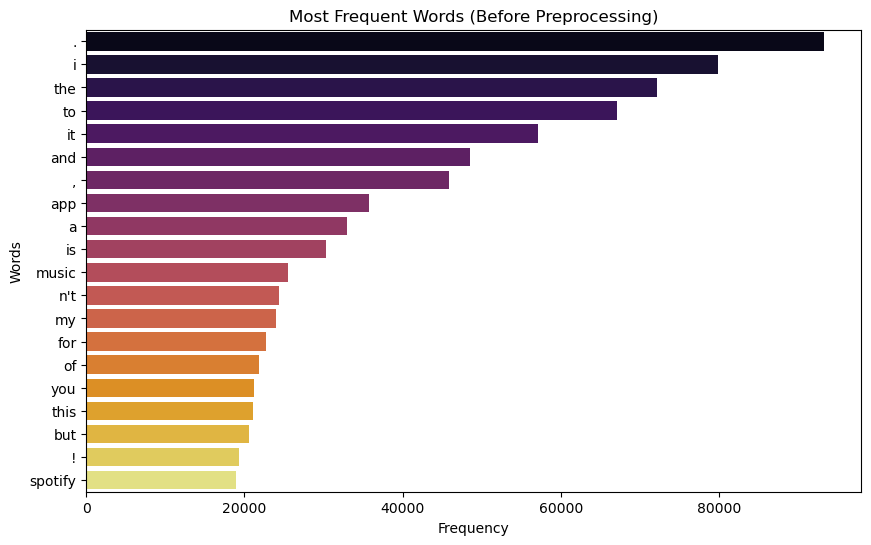

In [41]:
# Visualize most common words

most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, hue=words, legend=False, palette='inferno')
plt.title('Most Frequent Words (Before Preprocessing)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


### 4.2 After Preprocessing

In [54]:
# Aggregate all text in the cleaned reviews

all_words = ' '.join(raw_reviews['cleaned_review']).lower()
word_tokens = word_tokenize(all_words)
word_freq = Counter(word_tokens)

In [55]:
word_freq.most_common(20)

[('app', 35599),
 ('song', 32912),
 ('music', 25642),
 ('spotify', 18778),
 ('play', 13514),
 ('ad', 10354),
 ('playlist', 10159),
 ('like', 9914),
 ('listen', 9326),
 ('cant', 9101),
 ('love', 9047),
 ('premium', 8944),
 ('good', 8726),
 ('great', 7304),
 ('dont', 7147),
 ('even', 6984),
 ('time', 6665),
 ('im', 6616),
 ('get', 6592),
 ('want', 6439)]

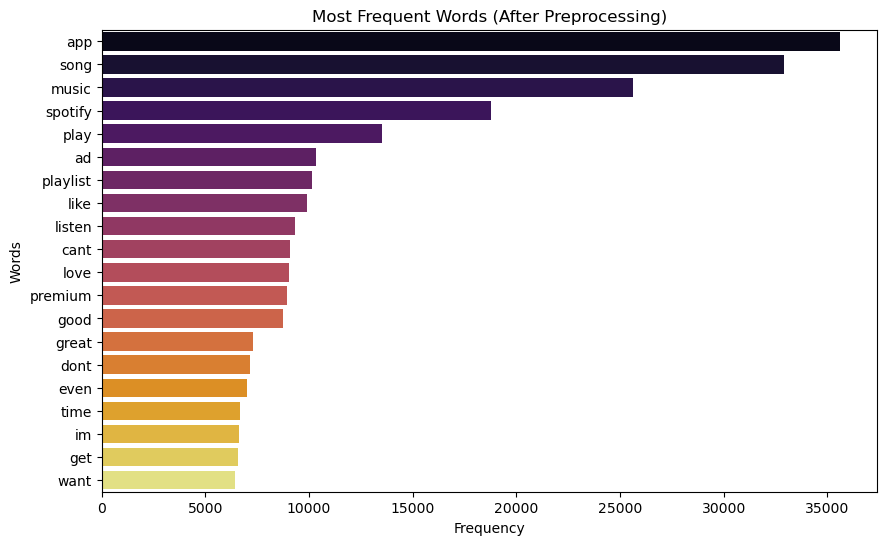

In [56]:
# Visualize most common words

most_common_words = word_freq.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, hue=words, legend=False, palette='inferno')
plt.title('Most Frequent Words (After Preprocessing)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [46]:
!pip install wordcloud

from wordcloud import WordCloud

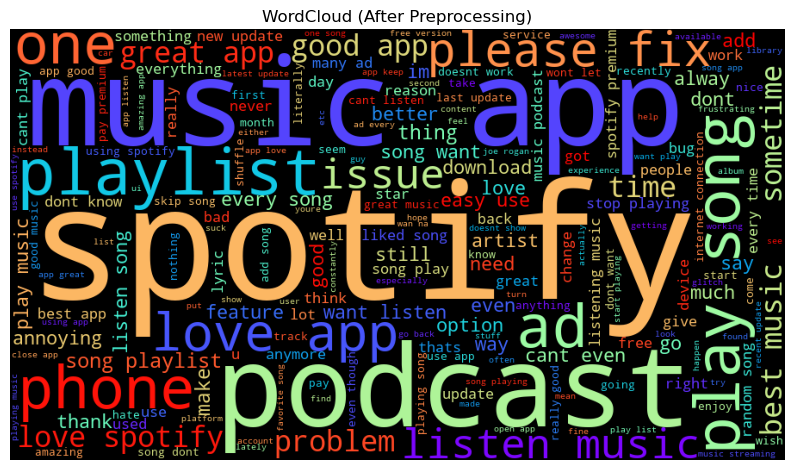

In [67]:
# Creating a Word Cloud

cleaned_wordcloud = WordCloud(width=900, height=500, background_color='black', colormap='rainbow').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(cleaned_wordcloud)
plt.axis('off')
plt.title('WordCloud (After Preprocessing)')
plt.show()

In [68]:
# Save cleaned dataset
raw_reviews.to_csv('spotify_reviews_cleaned.csv', index=False)
